In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'./data/data_clean.csv')

In [3]:
df.head(2)

,Author,Comment,Published,clean_comment,tokens,stem_comment,label
0,@ulfianaini,"Zonasi gak berlaku di sekolah negeri favorit, ...",2024-12-16T04:12:04Z,zonasi gak berlaku sekolah negeri favorit rela...,"['zonasi', 'gak', 'berlaku', 'sekolah', 'neger...","['zonasi', 'gak', 'berlaku', 'sekolah', 'neger...",netral
1,@somecomfort,"test mtk, 7x8 berapa? jangan kelamaan mikirnya...",2024-12-15T08:06:03Z,test mtk x mikirnya wk,"['test', 'mtk', 'x', 'mikirnya', 'wk']","['test', 'mtk', 'x', 'mikirnya', 'wk']",netral


In [21]:
df.isna().sum()

Author           0
Comment          0
Published        0
clean_comment    0
tokens           0
stem_comment     0
label            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df = df.dropna()

In [22]:
# Train test split

X = df['clean_comment']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training:", len(X_train))
print("Testing:", len(X_test))

Training: 8044
Testing: 2012


In [23]:
# Menggunakan TF-IDF untuk vectorisasi teks

vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [24]:
print(round(X_train, 4))

  (0, 143)	0.5099
  (0, 152)	0.4607
  (0, 516)	0.3914
  (0, 595)	0.3425
  (0, 693)	0.4236
  (0, 731)	0.1984
  (0, 994)	0.1961
  (1, 124)	0.208
  (1, 168)	0.1778
  (1, 201)	0.235
  (1, 253)	0.2142
  (1, 254)	0.2466
  (1, 328)	0.1113
  (1, 331)	0.2303
  (1, 340)	0.2211
  (1, 489)	0.1266
  (1, 497)	0.183
  (1, 529)	0.1707
  (1, 540)	0.2019
  (1, 570)	0.4369
  (1, 592)	0.2023
  (1, 631)	0.2218
  (1, 721)	0.2509
  (1, 778)	0.1999
  (1, 823)	0.1845
  :	:
  (8039, 751)	0.2003
  (8039, 782)	0.219
  (8039, 813)	0.1249
  (8039, 850)	0.1588
  (8039, 907)	0.128
  (8039, 924)	0.2034
  (8039, 991)	0.1066
  (8040, 725)	0.7117
  (8040, 994)	0.3963
  (8040, 999)	0.5801
  (8041, 51)	0.464
  (8041, 60)	0.1295
  (8041, 285)	0.168
  (8041, 295)	0.5161
  (8041, 389)	0.2839
  (8041, 423)	0.3997
  (8041, 509)	0.232
  (8041, 555)	0.4233
  (8042, 74)	0.8253
  (8042, 593)	0.4819
  (8042, 994)	0.2943
  (8043, 229)	0.647
  (8043, 261)	0.4922
  (8043, 301)	0.4933
  (8043, 858)	0.3096


In [25]:
# Mapping dan Normalisasi data labels

df_mapping = {
    'positif':0,
    'negatif':1,
    'netral':2
}

y_train = y_train.map(df_mapping)
y_test = y_test.map(df_mapping)

In [26]:
y_train.value_counts()

label
2    7454
0     413
1     177
Name: count, dtype: int64

In [28]:
# Selection models

models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC()
}

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predict = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision, Recall, F1 Score
    accuracy[key] = accuracy_score(y_test, predict)
    precision[key] = precision_score(y_test, predict, average='weighted') 
    recall[key] = recall_score(y_test, predict, average='weighted')
    f1[key] = f1_score(y_test, predict, average='weighted')


In [29]:
# Menampilkan metriks dari setiap model

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()

round(df_model, 2)

,Accuracy,Precision,Recall,F1-Score
Naive Bayes,0.93,0.93,0.93,0.89
SVM,0.94,0.94,0.94,0.92


In [30]:
# Evaluasi model

y_pred = models['Naive Bayes'].predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred).round(5))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=['Positif', 'Negatif', 'Netral']))

Akurasi: 0.92744
Laporan Klasifikasi:
               precision    recall  f1-score   support

     Positif       1.00      0.02      0.03       114
     Negatif       1.00      0.06      0.11        36
      Netral       0.93      1.00      0.96      1862

    accuracy                           0.93      2012
   macro avg       0.98      0.36      0.37      2012
weighted avg       0.93      0.93      0.89      2012



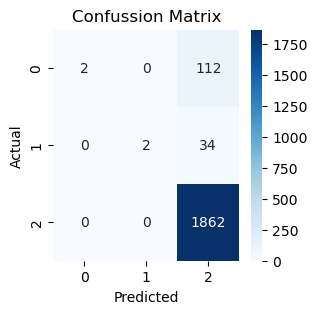

In [31]:
# Confussion Matrix

matrix_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(matrix_rf, annot = True, fmt='d', cmap="Blues")
plt.title('Confussion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()